In [18]:
import numpy as np
import matplotlib as plt
import math
import cv2
import scipy

In [19]:
#computes the error or energy term using solved m, b and vectors of x, y values
def E(m, b, x, y):
  sum = 0.
  for i in range(x.size):
    sum += (y[i] - (m * x[i] + b) )**2
  return sum

In [4]:
def plot_xy(x_array, y_array, x_label, y_label, plot_title, line_style):
  plt.pyplot.plot(x_array, y_array, linestyle = line_style) #draw line
  plt.pyplot.xlabel(x_label)
  plt.pyplot.ylabel(y_label)
  plt.pyplot.title(plot_title)
  plt.pyplot.show()

In [20]:
#assume we know that y = 2.5x - 3.2.   #m = 2.5, b = -3.2.
x_list = []
y_list = []
y_exact_list = []
m = 2.5
b = -3.2

for i in range (-3, 4): #i = -3, -2, -1, 0, 1, 2, 3
  y_e = m*i + b #y_e exact
  y_i = round(y_e)
  x_list.append(i)
  y_list.append(y_i)
  y_exact_list.append(y_e)
print("x, y list: ", x_list, y_list)

x = np.array(x_list) #list converted to vector
y = np.array(y_list) #list converted to vector
y_exact = np.array(y_exact_list) #list converted to vector

print("Equation: y = ", m, "x + ", b)
print("x: ", x)
print("y: ", y)
print("y exact: ", y_exact)
print()

x, y list:  [-3, -2, -1, 0, 1, 2, 3] [-11, -8, -6, -3, -1, 2, 4]
Equation: y =  2.5 x +  -3.2
x:  [-3 -2 -1  0  1  2  3]
y:  [-11  -8  -6  -3  -1   2   4]
y exact:  [-10.7  -8.2  -5.7  -3.2  -0.7   1.8   4.3]



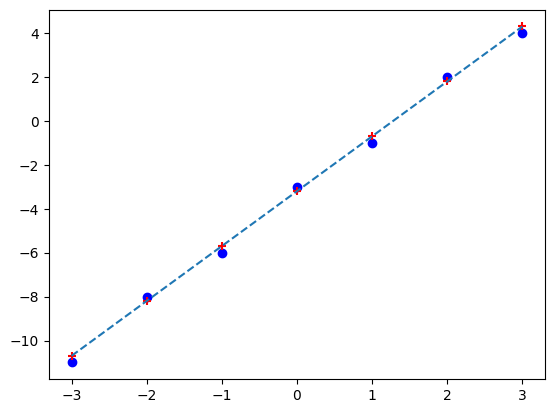

In [21]:
plt.pyplot.scatter(x, y, c="b", marker = "o") #blue circle rounded y
plt.pyplot.scatter(x,y_exact, c="r", marker = "+") #red + for y exacvt
plt.pyplot.plot(x, y_exact, linestyle = "--") #draw line (exact)
plt.pyplot.show()

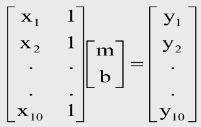

In [22]:
#X = [m, b] = inverse(A^T * A)*A^T * Y   in AX = Y or A[m b] = Y.  Row of A = [x_i 1]
one = np.ones(x.size) # one: [1 1 1 1 1 1 1]
A = np.matrix([x, one]).T #Transpose makes it look like matrix A shown above
print("x = \n",x)
print("one = \n", one)
print("A = \n", A)

x = 
 [-3 -2 -1  0  1  2  3]
one = 
 [1. 1. 1. 1. 1. 1. 1.]
A = 
 [[-3.  1.]
 [-2.  1.]
 [-1.  1.]
 [ 0.  1.]
 [ 1.  1.]
 [ 2.  1.]
 [ 3.  1.]]


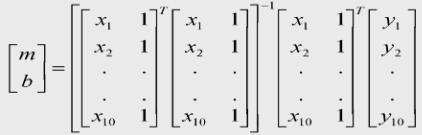

In [23]:
#X = [m, b] = (A^T * A)^(-1) * A^T * Y;   A^#1 = (A^T * A)^(-1) * A^T ; X = A^#1 * Y
X = np.linalg.inv(A.T @ A) @ A.T @ y
print("[m, b]: ", X) #in matrix form (not vector) with 1 row and 2 columns


[m, b]:  [[ 2.5        -3.28571429]]


In [24]:
m_solved = X[0,0] #row 0, column 0
b_solved = X[0,1] #row 0, column 1
error = E(m_solved, b_solved, x, y) #call the
print("Solved m, b = ", m_solved, ", ", b_solved)
print ("Final Error from Pseudo-inverse method: ", error)

Solved m, b =  2.5 ,  -3.2857142857142856
Final Error from Pseudo-inverse method:  0.42857142857142844


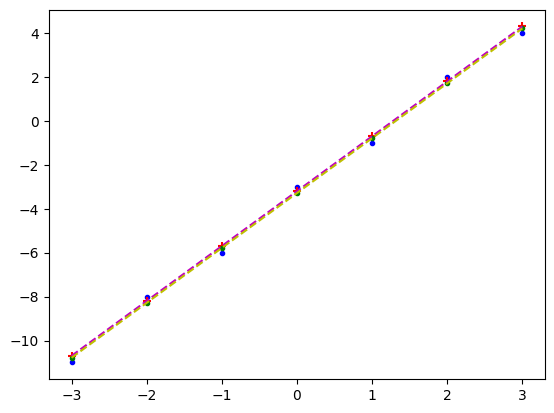

In [25]:
y_solved = m_solved*x + b_solved
plt.pyplot.scatter(x, y, c="b", marker = ".") #blue circle rounded y
plt.pyplot.scatter(x,y_exact, c="r", marker = "+") #red + for y exact
plt.pyplot.plot(x, y_exact, c="m",linestyle = "--") #draw line (exact)

plt.pyplot.scatter(x,y_solved, c="g", marker = ".") #red + for y exacvt
plt.pyplot.plot(x, y_solved, c="y",linestyle = "--") #draw line (exact)

plt.pyplot.show()

In [9]:
def dE_dm(m, b, x, y, use_numerical_method):
  if use_numerical_method:
      sqrt_epsilon = math.sqrt(np.finfo(float).eps)
      h = m * sqrt_epsilon
      sum = (E(m+h, b, x, y) - E(m-h, b, x, y))/(2*h)
  else:
    sum = 0.
    for i in range(x.size):
      sum += (y[i] - m * x[i] - b)*(-x[i]) #dE_dm derivative for each point i
  return sum

In [10]:
def dE_db(m, b, x, y, use_numerical_method):
  if use_numerical_method:
      sqrt_epsilon = math.sqrt(np.finfo(float).eps)
      h = b * sqrt_epsilon
      sum = (E(m, b+h, x, y) - E(m, b-h, x, y))/(2*h)
  else:
    sum = 0.
    for i in range(x.size):
         sum += (y[i] - m * x[i] - b)*(-1) #dE_db derivative for each point i
  return sum

In [11]:
use_numerical_method = False #For Quiz, you have to try use_numerical_method = False first. Then try True.

In [13]:
# E = Sum of (y_i - m* x_i - b)^2.
# dE/dm = Sum of (y_i - m * x_i - b)*(-x_i)
# dE/db = Sum of (y_i - m * x_i - b)*(-1)
step_size = 0.01
m_threshold = 0.0000001 #stop if change by less than this amount
b_threshold = 0.000001  #stop if change by less than this amount
m_old = 0.
b_old = 0.
m = np.random.random(20)[0] - 10     #m is -10 to 10 random
b = np.random.random(100)[0] - 50    #b is -50 to 50 random
i = 0
E_now = E(m, b, x, y)
E_list = [E_now] #starting list of 1 value using m_0, b_0.
i_list = [i] #starts with [0]
print("E for iteration ", i, "is ", E_now, "m = ", m, "b = ", b)

E for iteration  0 is  19068.333663109614 m =  -9.274922635221342 b =  -49.86243840202509


In [17]:
#continue looping while one m or b is still changing significantly
while abs(m-m_old)> m_threshold or abs(b-b_old)> b_threshold:
  i+= 1 #iteration no.
  m_old = m
  b_old = b
  dm = dE_dm(m, b, x, y, use_numerical_method)
  db = dE_db(m, b, x, y, use_numerical_method)
  m += -step_size * dm
  b += -step_size * db
  E_now = E(m, b, x, y)
  E_list.append(E_now)
  i_list.append(i)
  print("E for iteration ", i, "is ", E_now, "m = ", m, "b = ", b)

print("\nFinal Error Gradient Descent = ", E_now)
print("m, b =", m, b)


Final Error Gradient Descent =  0.42857142974725365
m, b = 2.4999999999999996 -3.285727246228695


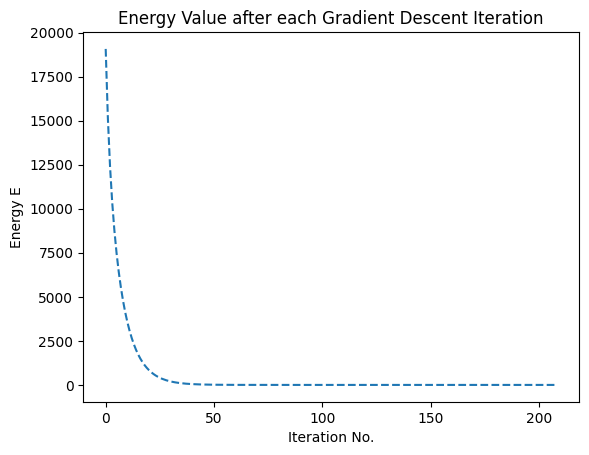

In [16]:
plot_xy(x_array = np.array(i_list), y_array = np.array(E_list), x_label = "Iteration No.",
        y_label= "Energy E", plot_title = "Energy Value after each Gradient Descent Iteration",
        line_style = "--")

In [ ]:
#Gauss Newton Algorithm. WE WILL SKIP THIS IN LECTURE/QUIZ.
use_numerical_method = False

#for non-linear problems, we should use smaller step size such as 0.1, not use 1
#Note that even problem of finding a, b, c, in a*x^2 + b*x + c = 0 is linear
#   in the unknowns a, b, and c.
step_size = 1

max_iterations = 500
m_threshold = 0.0000001
b_threshold = 0.000001
m_old = 0.
b_old = 0.
m = np.random.random(20)[0]  - 10
b = np.random.random(100)[0]  - 50
i = 0
E_now = E(m, b, x, y)
E_list = [E_now] #starting list of 1 value using m_0, b_0.
i_list = [i] #starts with [0]
print("E for iteration ", i, "is ", E_now, "m = ", m, "b = ", b)

one = np.ones(x.size)
JT = -np.matrix([x, one])
J = JT.T
print("J = \n", J)

E for iteration  0 is  18892.989198136213 m =  -9.105299953173951 b =  -49.76372289596187
J = 
 [[ 3. -1.]
 [ 2. -1.]
 [ 1. -1.]
 [-0. -1.]
 [-1. -1.]
 [-2. -1.]
 [-3. -1.]]


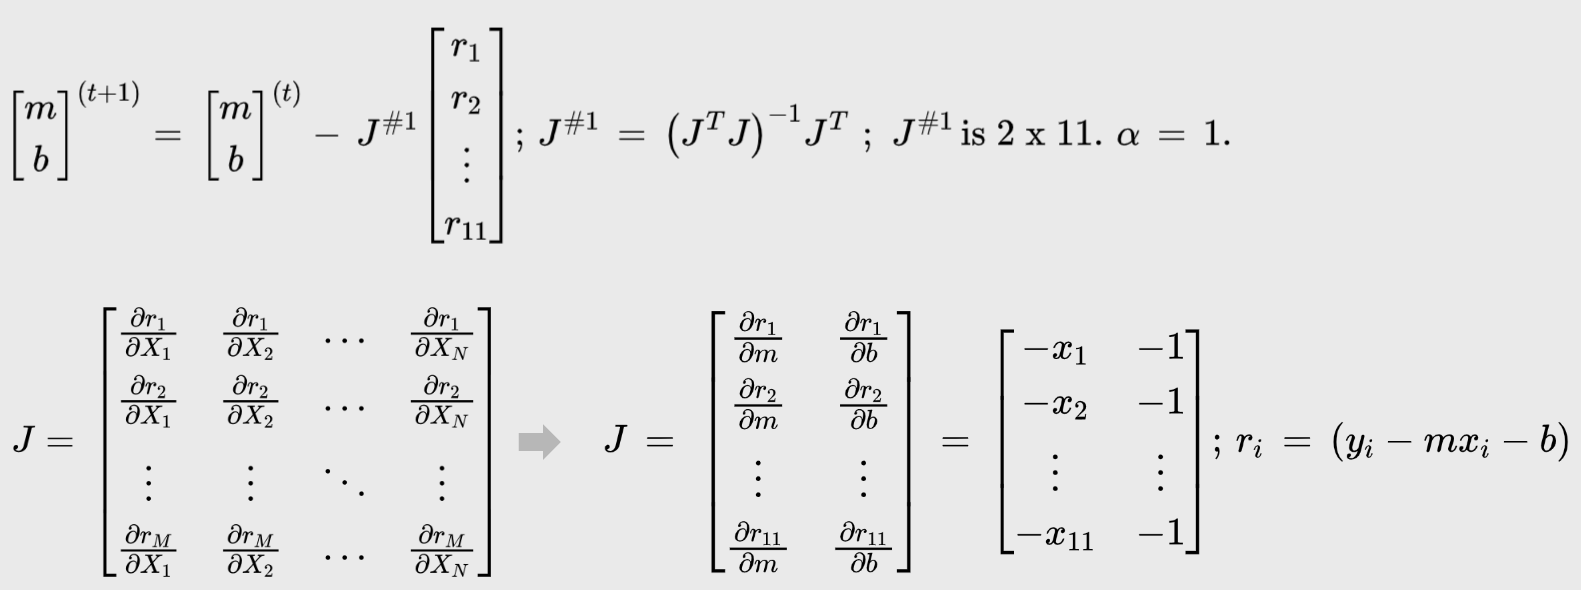

In [ ]:
while (abs(m-m_old)> m_threshold or abs(b-b_old)> b_threshold) and i < max_iterations:
  i+= 1
  m_old = m
  b_old = b
  r = y - (m * x + b) #residue vector
  print("r = ", r)
  delta = np.linalg.inv(J.T @ J) @ J.T @ r #vector [dm, db]
  print("Delta = \n", delta)
  #temp = input("Enter to continue: ")
  m += -step_size * delta[0,0] # delta[0,0] is dm
  b += -step_size * delta[0,1]

  E_now = E(m, b, x, y)
  E_list.append(E_now)
  i_list.append(i)
  print("E for iteration ", i, "is ", E_now, "m = ", m, "b = ", b)

print("\nFinal Error Gauss Newton = ", E_now)


Final Error Gauss Newton =  0.42857142857142844


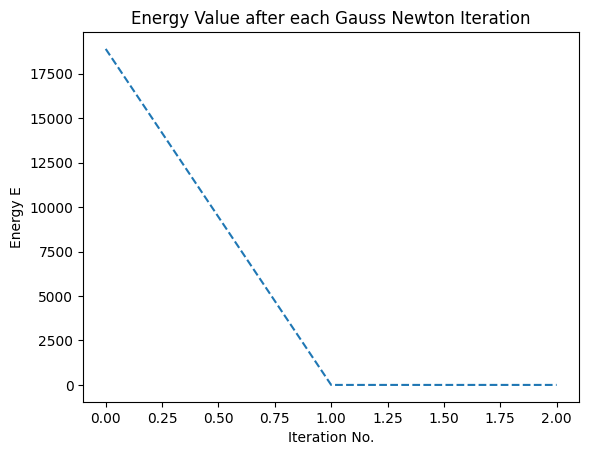

In [ ]:
plot_xy(x_array = np.array(i_list), y_array = np.array(E_list), x_label = "Iteration No.",
        y_label= "Energy E", plot_title = "Energy Value after each Gauss Newton Iteration",
        line_style = "--")